In [ ]:
import sys
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Get the absolute path of the project root (assuming you run the notebook from /your_project/notebooks/)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

# Now, import your module
# from API.model.random_forest_classifier import RandomForestClassifier
from API.model.Decision_Tree import DecisionTree

import numpy as np
import pandas as pd

df=pd.read_csv(r"..\API\data\processed\train_data.csv")
df_test=pd.read_csv(r"..\API\data\processed\test_data.csv")
df.head()



x_train,x_test,y_train,y_test= train_test_split(df.drop(["class"],axis=1),df['class'],test_size=0.2,random_state=42)

param_grid = {
    'n_learners': [100, 250, 500],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 5, 10],
    'min_information_gain': [0.01, 0.05, 0.1]
}

best_score = 0
best_param = None

param_grid = {
   'max_depth': [5,8, 10,12, 15,18,20,22,24,26,28,30],
    'min_samples_leaf': [1,2,3,4, 5,6,7,8,9 ,10,11,12,13,14,15],
    'min_information_gain': [.01, 0.05, 0.1,0.02]
}

for max_depth in param_grid['max_depth']:
    for min_samples_leaf in param_grid['min_samples_leaf']:
        for min_information_gain in param_grid['min_information_gain']:
            classifier=DecisionTree(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_information_gain=min_information_gain)
            classifier.train(np.array(x_train),np.array(y_train))
            y_pred=classifier.predict(np.array(x_test))
            test_acc=accuracy_score(y_test, y_pred)
            print(f'Param: { max_depth, min_samples_leaf, min_information_gain} \nScore: {test_acc} \n')
            if test_acc > best_score:
                best_score = test_acc
                best_param = { 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_information_gain': min_information_gain}

print(f'Best score: {best_score} \n Best param: {best_param}')



train_acc=accuracy_score(y_train, classifier.predict(np.array(x_train)))
test_acc=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average="weighted")
recall=recall_score(y_test, y_pred, average="weighted")
f1_score=f1_score(y_test, y_pred, average="weighted")
conf_matrix=confusion_matrix(y_test, y_pred)
print(f'Training accuracy: {train_acc} \n Testing accuracy: {test_acc} \n Precision: {precision} \n Recall: {recall} \n F1 Score: {f1_score} \n \n Confusion Matrix: \n {conf_matrix} \n \n')
# print(classification_report(y_test, y_pred))

Param: (5, 1, 0.01) 
Score: 0.9667576283800545 

Param: (5, 1, 0.05) 
Score: 0.9154056065492434 

Param: (5, 1, 0.1) 
Score: 0.8992805755395683 

Param: (5, 1, 0.02) 
Score: 0.966013396179608 

Param: (5, 2, 0.01) 
Score: 0.9667576283800545 

Param: (5, 2, 0.05) 
Score: 0.9154056065492434 

Param: (5, 2, 0.1) 
Score: 0.8992805755395683 

Param: (5, 2, 0.02) 
Score: 0.966013396179608 

Param: (5, 3, 0.01) 
Score: 0.9667576283800545 

Param: (5, 3, 0.05) 
Score: 0.9154056065492434 

Param: (5, 3, 0.1) 
Score: 0.8992805755395683 

Param: (5, 3, 0.02) 
Score: 0.966013396179608 

Param: (5, 4, 0.01) 
Score: 0.9667576283800545 

Param: (5, 4, 0.05) 
Score: 0.9154056065492434 

Param: (5, 4, 0.1) 
Score: 0.8992805755395683 

Param: (5, 4, 0.02) 
Score: 0.966013396179608 

Param: (5, 5, 0.01) 
Score: 0.9667576283800545 

Param: (5, 5, 0.05) 
Score: 0.9154056065492434 

Param: (5, 5, 0.1) 
Score: 0.8992805755395683 

Param: (5, 5, 0.02) 
Score: 0.966013396179608 

Param: (5, 6, 0.01) 
Score: 0.

In [6]:
import json

# Save best hyperparameters
with open(r"..\API\model\Hyperparams\DT_hparam.json", "w") as f:
    json.dump(best_param, f)

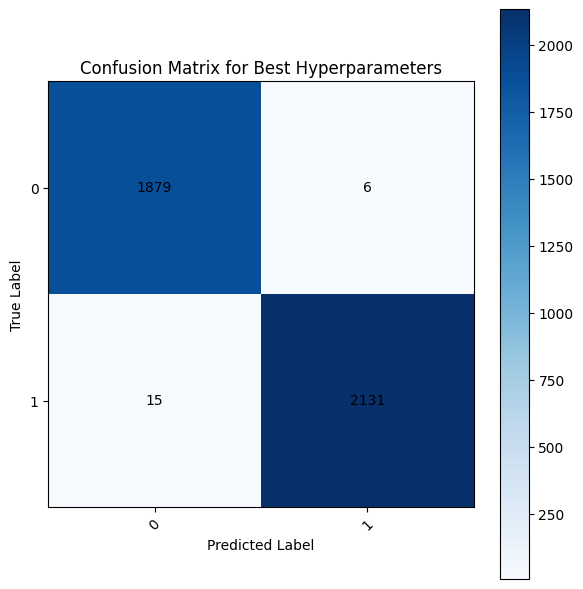

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Use the best hyperparameters found from Grid Search
best_classifier = DecisionTree(max_depth=best_param['max_depth'],
                               min_samples_leaf=best_param['min_samples_leaf'],
                               min_information_gain=best_param['min_information_gain'],
                               )

# Train the model on the full training data
best_classifier.train(x_train, y_train)

# Predict on the validation set
y_pred = best_classifier.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using matplotlib (without seaborn)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix for Best Hyperparameters')
plt.colorbar()

# Adding labels and formatting the plot
classes = np.unique(y_test)  # Corrected to use y_val for class labels
tick_marks = range(len(classes))

plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Annotate the confusion matrix with counts
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color="black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
